In [1]:
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

Using a csv file of S&P information, I took a slice of all the rows after July 2014, then took the first 20 rows and 19 columns from that time to have a more manageable dataset to work with.  

In [2]:
df2 = pd.read_csv('sp500_data.csv')
df2 = df2.rename(columns={'Unnamed: 0': 'Date'})

df3 = df2[df2.Date > '2014-07-01']
df3.head()

,Date,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
5395,2014-07-02,-2.690003,-0.038705,0.165625,0.000000,0.160000,0.187274,0.137688,1.994900,-0.019583,...,-0.240005,2.100006,0.932291,0.0,5.750000,1.190003,1.544400,6.070008,2.680001,-0.339996
5396,2014-07-03,2.449982,0.212884,-0.107169,-0.050004,0.340000,0.197132,0.236033,0.136237,0.088124,...,1.110001,-0.579986,1.373908,0.0,0.350006,0.010002,0.199283,3.000000,1.000000,0.029999
5397,2014-07-07,-3.789978,0.048381,0.233823,-0.220001,0.310001,-0.384399,0.049175,0.418434,0.019583,...,-0.519996,-3.729995,-1.658496,0.0,-3.720001,-0.909996,-0.846931,-0.519989,-0.870003,-0.330002
5398,2014-07-08,-0.630005,-0.687029,-0.087683,-1.069999,-0.090000,0.000000,-0.344215,-0.418435,-0.078333,...,-0.769996,-0.899994,-0.029440,0.0,-6.410004,-2.720001,0.269030,-0.730011,-1.839996,-0.460007
5399,2014-07-09,-0.229981,-0.406412,-0.302021,0.389999,-0.190002,0.354830,0.236033,0.720114,0.254582,...,-0.599998,4.860000,-0.863595,0.0,-2.479980,3.129998,1.424838,0.489991,2.559997,-0.369995


In [3]:
df3 = df3.iloc[:20, 1:20]
df3.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,ADI,AVGO,BRCM,FSLR,INTC,LLTC,MCHP,MU,NVDA
5395,-2.690003,-0.038705,0.165625,0.000000,0.160000,0.187274,0.137688,1.994900,-0.019583,0.117621,0.019472,0.730427,0.108684,-1.200005,-0.009729,-0.077999,-0.038813,-0.240002,0.000000
5396,2.449982,0.212884,-0.107169,-0.050004,0.340000,0.197132,0.236033,0.136237,0.088124,0.176434,0.399164,0.503406,-0.029639,-0.550003,0.058370,1.238272,0.135846,-0.360000,0.334236
5397,-3.789978,0.048381,0.233823,-0.220001,0.310001,-0.384399,0.049175,0.418434,0.019583,-0.009805,0.068149,-0.888361,-0.019761,-1.790001,-0.058370,-0.341259,-0.397827,-0.750000,-0.176947
5398,-0.630005,-0.687029,-0.087683,-1.069999,-0.090000,0.000000,-0.344215,-0.418435,-0.078333,-0.137225,-0.223918,-0.927846,0.088922,-2.800003,-0.204299,0.000000,-0.155249,0.330002,-0.098306
5399,-0.229981,-0.406412,-0.302021,0.389999,-0.190002,0.354830,0.236033,0.720114,0.254582,-0.156830,0.253128,0.562627,0.158084,-0.270004,0.048642,0.477756,0.261983,0.299999,0.393221


I created a frequency table, then created a heatmap using those values to provide a more visual image between the companies and the correlations between each other's stock values.

In [4]:
df3_corr = df3.corr()
df3_corr.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,ADI,AVGO,BRCM,FSLR,INTC,LLTC,MCHP,MU,NVDA
ADS,1.000000,-0.211222,-0.125711,0.218997,-0.099231,0.095863,-0.008093,-0.253817,0.254223,0.083124,-0.166147,-0.029514,-0.207167,0.144929,0.081981,0.351300,0.056800,0.372749,0.430722
CA,-0.211222,1.000000,-0.150964,0.173032,-0.048015,-0.002814,0.169903,0.260825,-0.024178,0.354446,0.154189,-0.079575,0.088930,0.280582,-0.014073,-0.057302,0.125877,-0.144356,0.047793
MSFT,-0.125711,-0.150964,1.000000,-0.101635,0.108450,-0.006620,0.018660,-0.036581,0.226305,0.146445,0.185295,0.354142,0.405205,0.211937,0.778620,0.054769,0.195064,0.263216,-0.077727
RHT,0.218997,0.173032,-0.101635,1.000000,0.213342,0.044258,0.758935,0.257631,0.484354,0.138097,0.083559,0.170696,-0.064702,0.626311,0.244149,0.342837,0.088966,0.127951,-0.086444
CTSH,-0.099231,-0.048015,0.108450,0.213342,1.000000,0.274518,0.262700,0.451357,-0.088899,0.141668,-0.005693,0.091190,-0.015662,0.254052,0.213205,-0.172100,-0.021820,0.112607,-0.412842


<AxesSubplot:>

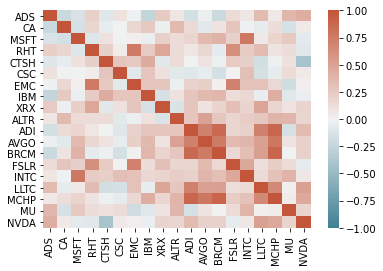

In [5]:
sns.heatmap(df3_corr, vmin=-1, vmax=1, cmap=sns.diverging_palette(220,20, as_cmap=True))

The standard way to represent the relationship between 2 measured data variables (in this case MSFT and CA) is through a scatterplot. Here we can see that there isn't a great emphasis on either direction within the graph as all 4 quadrants have a similar area of datapoints. 

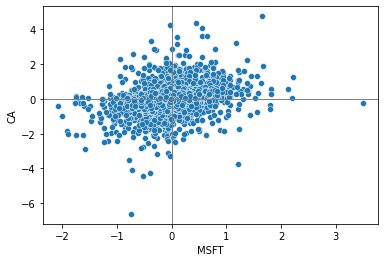

In [6]:
ax = sns.scatterplot(x=df2.MSFT, y=df2.CA)
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)